Logistic Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
##Create fake data where log(p/(1-p))=5+2*x1+3*x2
x=np.random.beta(0.5,0.5, (1000,2))*100-50
y=np.round(np.array([1/(1+np.exp(-np.array([*x[:,0]+3*x[:,1]+5]).T))]).T)
print(x.shape,y.shape)

(1000, 2) (1000, 1)


(array([519.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 481.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

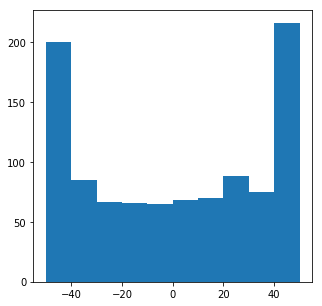

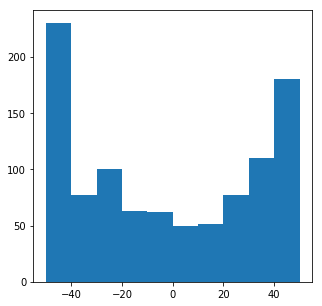

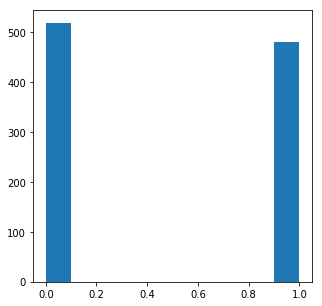

In [7]:
##Plot the data 
i=0
for col in x.T:
    fig,ax=plt.subplots(figsize = (5,5))
    ax.hist(col)
    i=i+1
fig,ax=plt.subplots(figsize = (5,5))
ax.hist(y[:,0])

In [103]:
#Initialize the bias and the weight 
b=np.zeros(1000)
w=np.zeros(2)
learning_rate=0.1
pred=[]
#Fit the algo ( No validation but who cares on fake data ^^)
for epoch in range(100):
    #Compute the prediction
    logit=np.dot(np.array([w]),x.T)+b
    y_pred=1/(1+np.exp(-logit))
    pred.append(y_pred)
    #Compute the error
    mse=np.mean(((y_pred.T-y)**2)[:,0])
    print("MSE:"+str(mse))
    #Update the bias and weigth with the gradient
    w=w-learning_rate*(np.mean(((y_pred.T-y)*x),axis=0))
    b=b-learning_rate*np.mean((y_pred.T-y))

MSE:0.25
MSE:0.03695895122568378
MSE:0.012562570656668224
MSE:0.00396499422530894
MSE:0.0035902269971155977
MSE:0.0035674402631657278
MSE:0.0035641356721392236
MSE:0.0035623699023637503
MSE:0.0035606857807831023
MSE:0.0035589869213911015
MSE:0.0035572798747502484
MSE:0.0035555708175252516
MSE:0.0035538622181091836
MSE:0.0035521549376233323
MSE:0.003550449264384615
MSE:0.003548745292605105
MSE:0.0035470430517110314
MSE:0.0035453425496091767
MSE:0.003543643787071381
MSE:0.003541946762507634
MSE:0.0035402514735490475
MSE:0.0035385579175728
MSE:0.0035368660918762085
MSE:0.0035351759937344565
MSE:0.003533487620419738
MSE:0.003531800969207577
MSE:0.003530116037378939
MSE:0.003528432822220889
MSE:0.003526751321026813
MSE:0.0035250715310964757
MSE:0.003523393449736024
MSE:0.0035217170742579693
MSE:0.0035200424019811837
MSE:0.0035183694302308604
MSE:0.0035166981563385124
MSE:0.0035150285776419494
MSE:0.0035133606914852468
MSE:0.0035116944952187355
MSE:0.0035100299861989853
MSE:0.003508367161788

[0.48575286 1.52796426] 0.059177678334085534


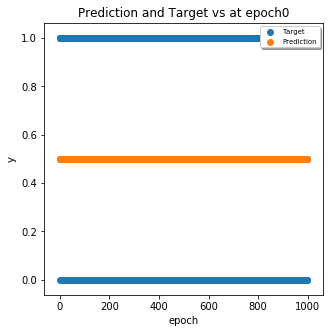

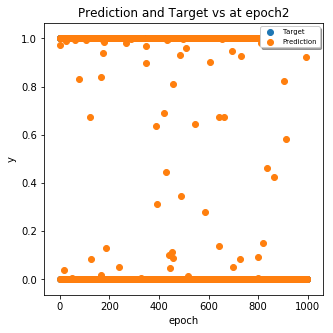

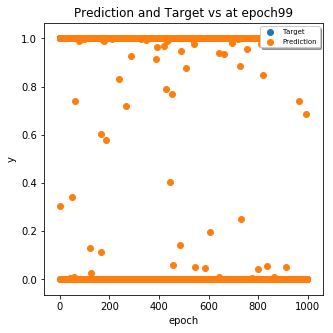

In [113]:
#Plot the prediction and the target over the training
print(w,b[0])
for i in [0,2,99]:
    fig,ax=plt.subplots(figsize = (5,5))
    ax.scatter([x for x in range(1000)],y[:,0],label="Target")
    ax.scatter([x for x in range(1000)],pred[i][0],label="Prediction")
    ax.set_xlabel("epoch")
    ax.set_ylabel("y")
    ax.legend(loc='upper right', shadow=True, fontsize='x-small')
    ax.set_title('Prediction and Target vs at epoch'+str(i))

In [111]:
(np.round(pred[i][0])==y[:,0]).sum()/1000

0.995